In [199]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [551]:
df = pd.read_csv('crypto_data.csv')

In [552]:
df = pd.DataFrame(df)

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [554]:
# I only want circulating coins so I look for and drop any False rows for the column IsTrading

In [559]:
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [560]:
df = df[df['IsTrading'] == True]

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [562]:
# Removing rows with at least 1 null value

In [563]:
df.dropna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [564]:
# Removed any rows where Total Coins Mined was less than 0

In [565]:
df = df[df["TotalCoinsMined"] > 0]

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 29.6+ KB


In [567]:
# Dropping CoinName column because the names don't really contribute to the model's analysis

In [568]:
df_coin_names = df['CoinName']

In [569]:
df = df.drop('CoinName', axis=1)

In [570]:
df = df.drop('IsTrading', axis=1)

In [571]:
df = df.drop('Unnamed: 0', axis=1)

In [572]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [573]:
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [574]:
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [575]:
# Changing categorical data into numerical (enconding) with get dummies function

In [576]:
df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    object 
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [578]:
# checking shapes

In [579]:
df.shape

(532, 98)

In [580]:
# before i reduce dimensionality, i will scale the data set 

In [581]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [582]:
df.shape

(532, 98)

In [530]:
df

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [583]:
df_scaled = df

In [584]:
df_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [585]:
#df = df_scaled

In [586]:
# using PCA for Dimensionality Reduction

In [587]:
# Importing Libraries 

In [588]:
df_shape = pd.DataFrame(df)

In [589]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [600]:
# Initialize PCA model and set n_components to .9 to save at least 90% of the dataset
pca = PCA(n_components=4)

In [601]:
# Get two principal components for the data.
df_pca = pca.fit_transform(df_scaled)

In [597]:
# Transform PCA data to a DataFrame
df2 = pd.DataFrame(data=df_pca)

In [594]:
df

,PC 1,PC 2,PC 3,PC4
0,-0.342980,0.951631,-0.541016,-0.021632
1,-0.326307,0.951805,-0.541356,-0.021609
2,2.306427,1.692103,-0.675540,-0.026457
3,-0.142383,-1.259042,0.204615,0.013820
4,-0.143880,-1.974383,0.359864,0.052933
...,...,...,...,...
527,2.462841,0.788436,0.115015,0.095775
528,-0.341025,0.951521,-0.541041,-0.021630
529,0.325953,-2.253365,0.422361,0.038586
530,-0.162647,-2.049730,0.471309,0.009710


In [598]:
# Transform PCA data to a DataFrame
df2

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-3.030888e-14,-1.119407e-13,1.693327e-11,-0.007129,-1.319756,-0.051813,...,-5.093640e-16,-1.089821e-15,3.609068e-15,4.168638e-15,-1.116902e-17,-2.153758e-15,4.603334e-15,-3.727546e-15,1.611650e-15,-2.722612e-15
1,-0.318434,1.032331,-0.591126,0.001386,-3.038057e-14,-1.121350e-13,1.679444e-11,-0.007739,-1.322514,-0.056674,...,-5.137025e-16,-9.996086e-16,3.386046e-15,3.944841e-15,1.321882e-17,-1.920282e-15,4.878571e-15,-3.858557e-15,1.639490e-15,-2.893643e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.144356e-14,-1.716924e-13,5.747701e-11,-0.054781,-1.542879,-0.943951,...,4.219710e-14,5.673996e-14,-4.036146e-14,-5.681678e-14,1.696452e-14,-4.210529e-14,-5.687981e-14,1.334438e-13,-4.707389e-14,8.879210e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.910306e-15,4.167586e-14,-1.492511e-11,-0.002071,0.281463,0.251862,...,-5.710778e-15,3.720381e-15,-4.513260e-15,-1.137534e-14,4.633205e-15,-3.496582e-15,-4.281593e-15,2.303438e-14,-6.409954e-15,1.863125e-14
4,-0.151768,-2.036192,0.396182,-0.001705,1.923548e-14,8.246556e-14,-2.069681e-11,0.027735,0.519099,0.188820,...,-1.048403e-13,-2.286185e-15,4.421477e-14,-6.998842e-14,-3.606377e-14,-1.820200e-14,1.376735e-13,-4.196608e-15,1.147976e-13,1.144212e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-6.821431e-15,-9.765998e-14,-1.002221e-10,-0.851713,2.041159,3.560713,...,-5.626155e-15,2.006776e-15,-5.853642e-15,-8.243670e-15,1.516157e-16,-3.470660e-15,-6.878240e-15,2.755324e-14,-3.756711e-15,2.065023e-14
528,-0.333144,1.032071,-0.590740,0.001399,-3.024454e-14,-1.120590e-13,1.696136e-11,-0.007154,-1.320125,-0.052460,...,-4.293752e-16,-1.135956e-15,3.762571e-15,3.986427e-15,1.313901e-16,-2.283248e-15,5.201385e-15,-3.780476e-15,1.559532e-15,-2.596651e-15
529,0.324349,-2.312308,0.421515,-0.001319,2.129726e-14,8.146132e-14,-1.599405e-11,0.017309,0.161077,-0.047787,...,-6.753337e-14,-2.267789e-14,8.501344e-15,-7.426407e-15,-7.826839e-15,1.047426e-14,1.406612e-14,3.782746e-14,8.249762e-15,2.869248e-14
530,-0.149364,-2.049336,0.412968,-0.001745,2.213948e-14,8.869710e-14,-2.117390e-11,0.028954,0.544389,0.233373,...,1.162548e-15,6.319676e-16,5.109542e-16,-1.462776e-15,2.312450e-16,-5.242998e-15,3.283844e-16,-1.611695e-15,3.572110e-16,1.287669e-15


In [492]:
# df.head()

In [602]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02793146, 0.02140508, 0.02050454, 0.02044482])

In [603]:
# the PCA model reduced the dimension 910 to 240 saving 90% of the dataset in the process

In [605]:
df2.shape

(532, 74)

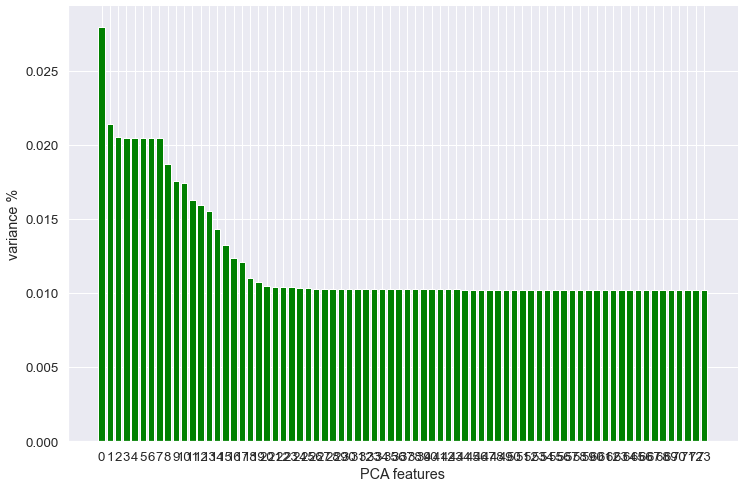

In [426]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

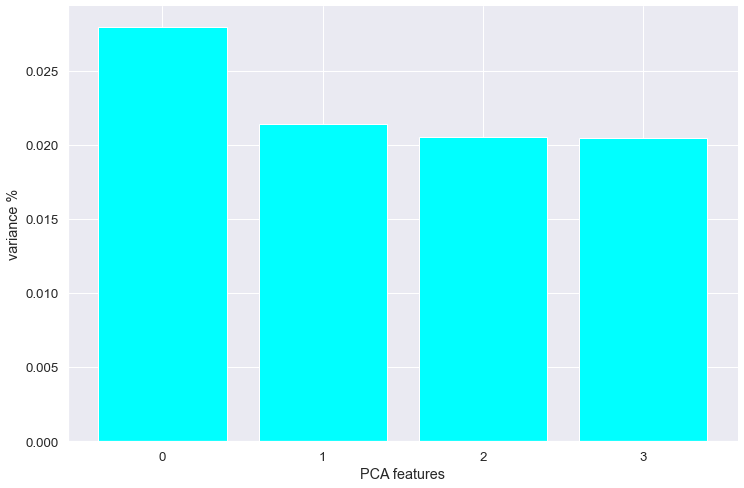

In [640]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='aqua')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

In [239]:
# Further reducing with t-SNE (down to 2d plot - 2 dimensions)

In [240]:
from sklearn.manifold import TSNE

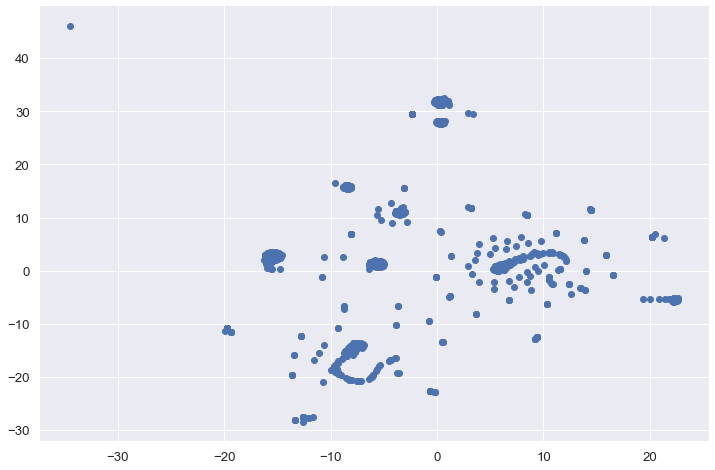

In [610]:
# Run t-SNE
tsne = TSNE(learning_rate=25,perplexity=30)
tsne_features = tsne.fit_transform(df2)

# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [260]:
#df_coin_names.value_counts()

In [633]:
df = pd.DataFrame(tsne_features)

In [612]:
# Use Kmeans to analyze clusters

In [613]:
from sklearn.cluster import KMeans

In [634]:
df2.shape

(532, 74)

In [638]:
crypto_pca = pd.DataFrame(df2)
crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-3.030888e-14,-1.119407e-13,1.693327e-11,-0.007129,-1.319756,-0.051813,...,-5.093640e-16,-1.089821e-15,3.609068e-15,4.168638e-15,-1.116902e-17,-2.153758e-15,4.603334e-15,-3.727546e-15,1.611650e-15,-2.722612e-15
1,-0.318434,1.032331,-0.591126,0.001386,-3.038057e-14,-1.121350e-13,1.679444e-11,-0.007739,-1.322514,-0.056674,...,-5.137025e-16,-9.996086e-16,3.386046e-15,3.944841e-15,1.321882e-17,-1.920282e-15,4.878571e-15,-3.858557e-15,1.639490e-15,-2.893643e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.144356e-14,-1.716924e-13,5.747701e-11,-0.054781,-1.542879,-0.943951,...,4.219710e-14,5.673996e-14,-4.036146e-14,-5.681678e-14,1.696452e-14,-4.210529e-14,-5.687981e-14,1.334438e-13,-4.707389e-14,8.879210e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.910306e-15,4.167586e-14,-1.492511e-11,-0.002071,0.281463,0.251862,...,-5.710778e-15,3.720381e-15,-4.513260e-15,-1.137534e-14,4.633205e-15,-3.496582e-15,-4.281593e-15,2.303438e-14,-6.409954e-15,1.863125e-14
4,-0.151768,-2.036192,0.396182,-0.001705,1.923548e-14,8.246556e-14,-2.069681e-11,0.027735,0.519099,0.188820,...,-1.048403e-13,-2.286185e-15,4.421477e-14,-6.998842e-14,-3.606377e-14,-1.820200e-14,1.376735e-13,-4.196608e-15,1.147976e-13,1.144212e-13


In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       532 non-null    float32
 1   1       532 non-null    float32
dtypes: float32(2)
memory usage: 4.3 KB


In [631]:
df = df.select_dtypes(include='object').columns.tolist()

In [635]:
df

,0,1
0,-7.156965,-13.563608
1,-6.185291,-20.106297
2,-11.703615,-27.529577
3,0.343159,31.808252
4,8.461699,10.518732
...,...,...
527,2.941705,29.650017
528,-9.297197,-19.105722
529,22.609983,-5.235289
530,20.239323,6.337914


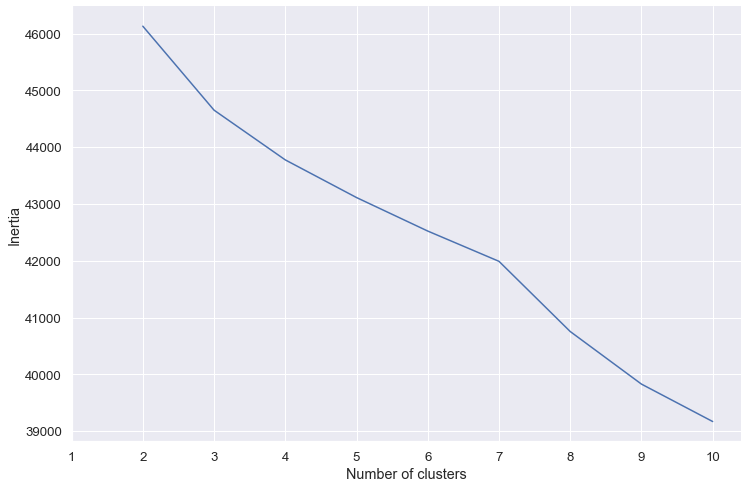

In [654]:
# Finding the best value for k
inertia = []
k = list(range(2, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df2)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

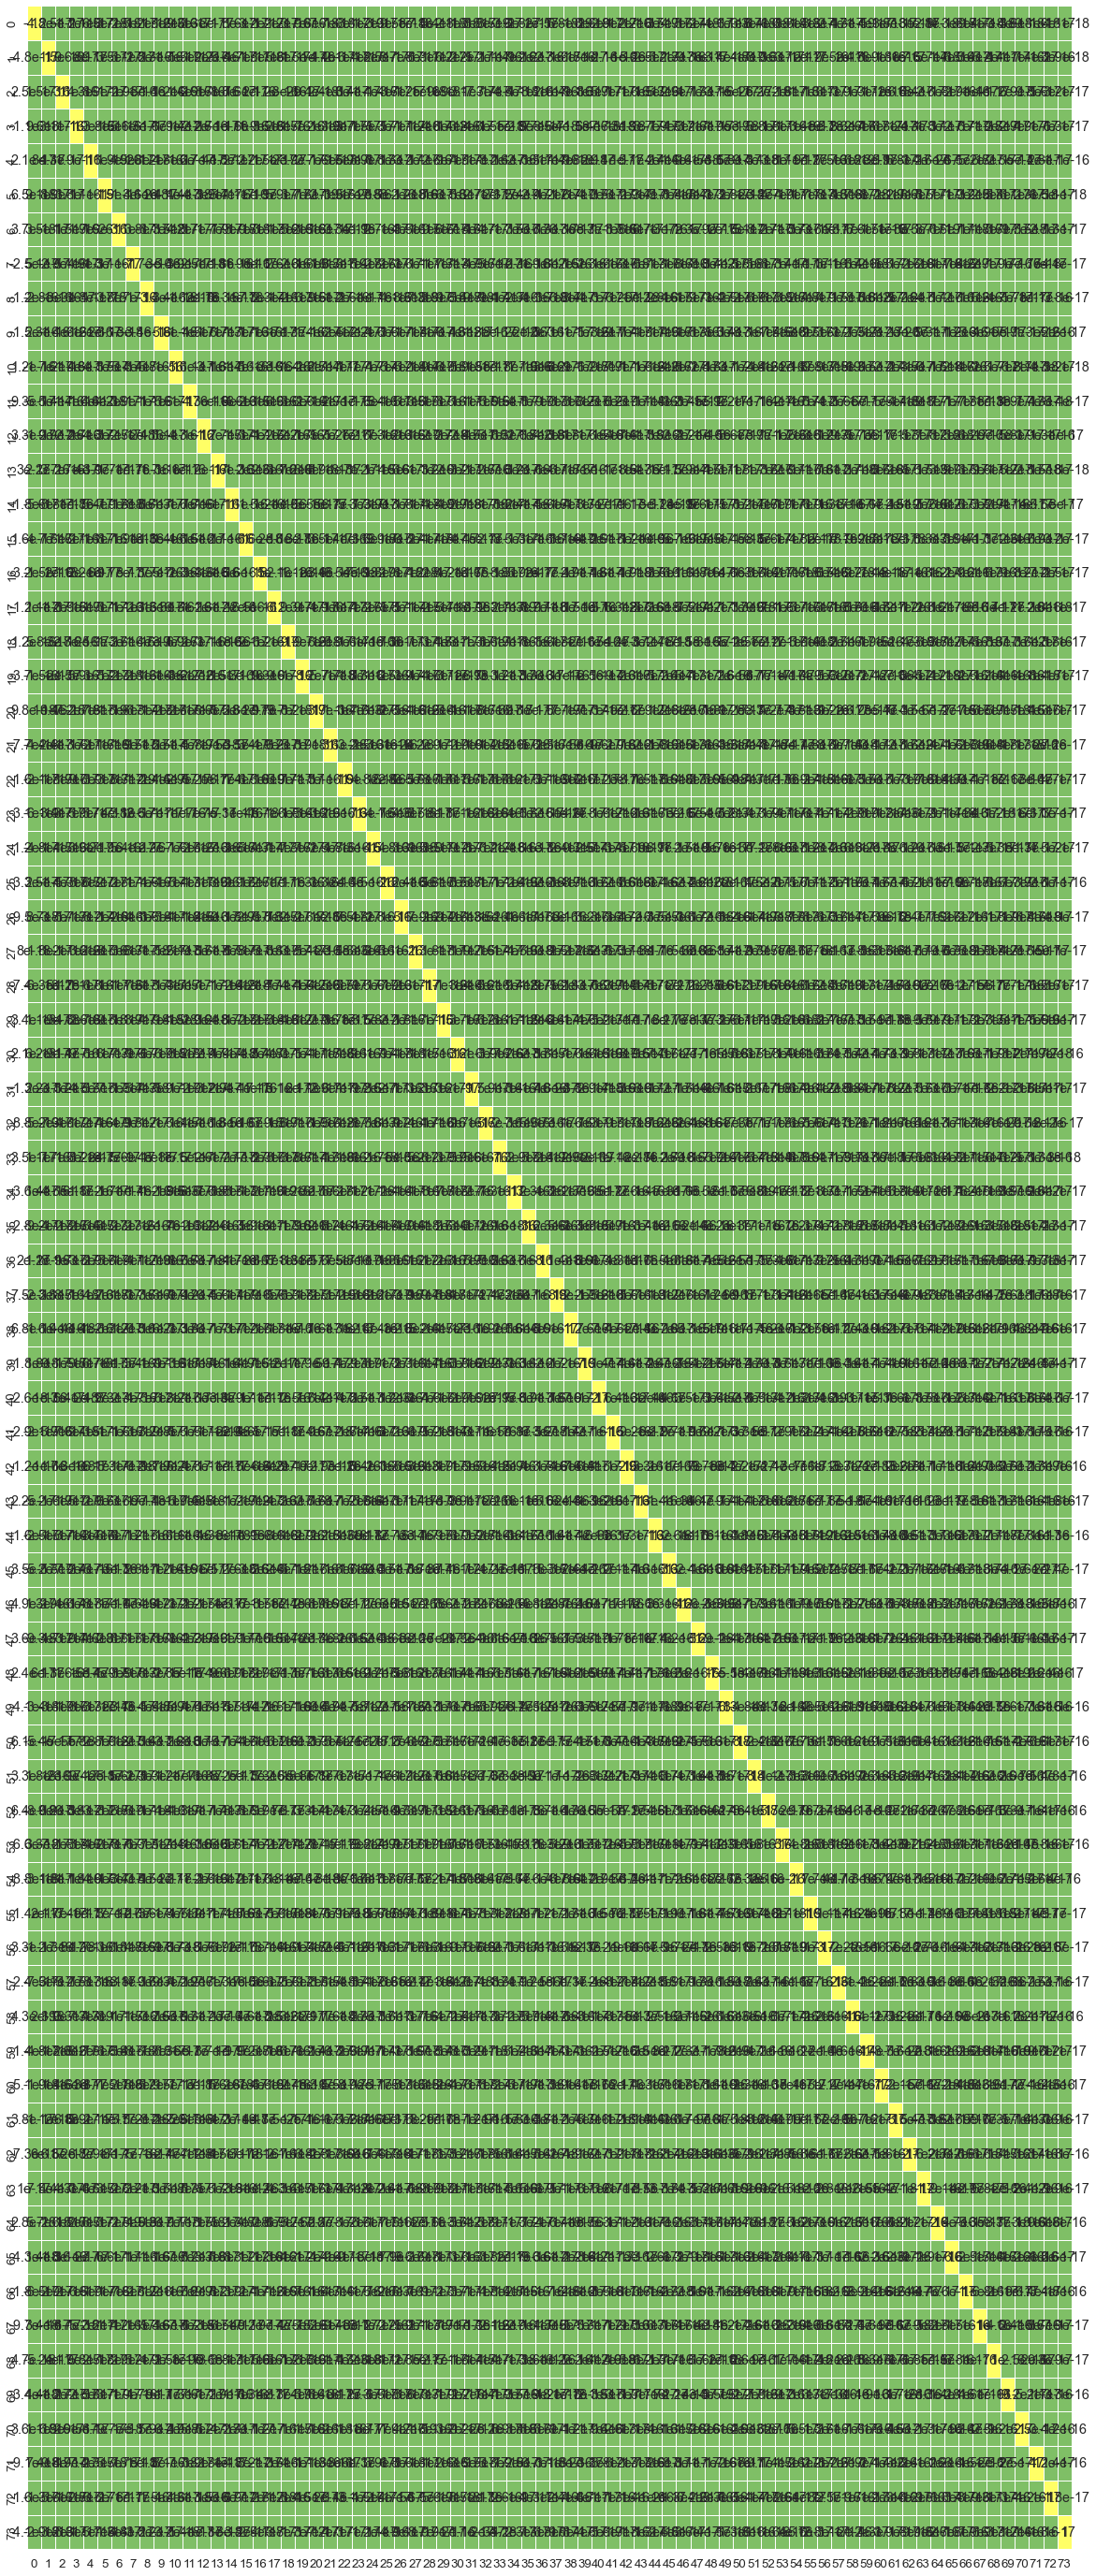

In [661]:
import seaborn as sns
# Heat map to identify highly correlated variables
plt.figure(figsize=(20,50))
sns.heatmap(df2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="summer")
plt.show()

In [664]:
k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df

,0,1
0,-7.156965,-13.563608
1,-6.185291,-20.106297
2,-11.703615,-27.529577
3,0.343159,31.808252
4,8.461699,10.518732
...,...,...
527,2.941705,29.650017
528,-9.297197,-19.105722
529,22.609983,-5.235289
530,20.239323,6.337914


In [665]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [666]:
get_clusters(4, k_means_df)

,0,1,class
0,-7.156965,-13.563608,2
1,-6.185291,-20.106297,2
2,-11.703615,-27.529577,2
3,0.343159,31.808252,3
4,8.461699,10.518732,1
...,...,...,...
527,2.941705,29.650017,3
528,-9.297197,-19.105722,2
529,22.609983,-5.235289,1
530,20.239323,6.337914,1


In [669]:
k_means_df['class'].nunique()

4

In [670]:
# K means subdivided crypto currencies into 4 different classes based on clusters

In [675]:
def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])
    plt.xlabel('pca1')
    plt.ylabel('pca2')
    plt.show()

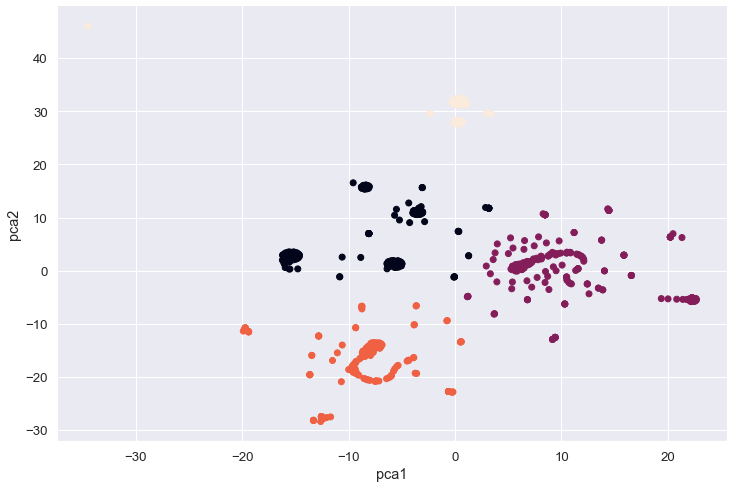

In [676]:
show_clusters(k_means_df)

In [704]:
df_coin_names

<bound method Series.reset_index of 0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object>

In [705]:
k_means_df

<bound method DataFrame.reset_index of              0          1  class
0    -7.156965 -13.563608      2
1    -6.185291 -20.106297      2
2   -11.703615 -27.529577      2
3     0.343159  31.808252      3
4     8.461699  10.518732      1
..         ...        ...    ...
527   2.941705  29.650017      3
528  -9.297197 -19.105722      2
529  22.609983  -5.235289      1
530  20.239323   6.337914      1
531  -3.230747  10.642817      0

[532 rows x 3 columns]>

In [709]:
df_coins

NameError: name 'df_coins' is not defined

In [698]:
final_df = pd.concat([df_coins, k_means_df],axis=1, sort=False)
df = final_df 
df.info

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid

In [681]:
coinclass1 = df[df['class'] == 1]
coinclass2 = df[df['class'] == 2]
coinclass3 = df[df['class'] == 3]
coinclass4 = df[df['class'] == 4]

In [687]:
k_means_df.info

<bound method DataFrame.info of              0          1  class
0    -7.156965 -13.563608      2
1    -6.185291 -20.106297      2
2   -11.703615 -27.529577      2
3     0.343159  31.808252      3
4     8.461699  10.518732      1
..         ...        ...    ...
527   2.941705  29.650017      3
528  -9.297197 -19.105722      2
529  22.609983  -5.235289      1
530  20.239323   6.337914      1
531  -3.230747  10.642817      0

[532 rows x 3 columns]>

In [685]:
df_coin_names

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object